In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
df.shape

(30, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [8]:
df.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

In [10]:
df[['YearsExperience', 'Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

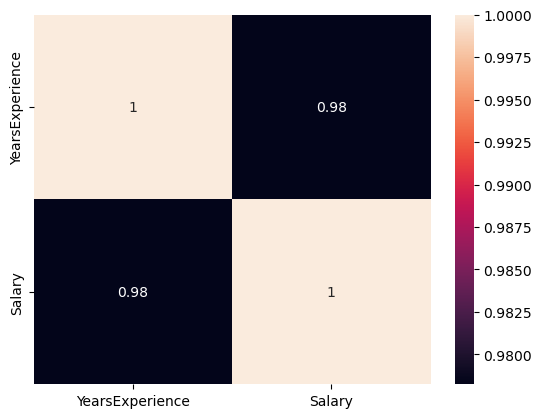

In [12]:
sns.heatmap(df.corr(), annot=True)

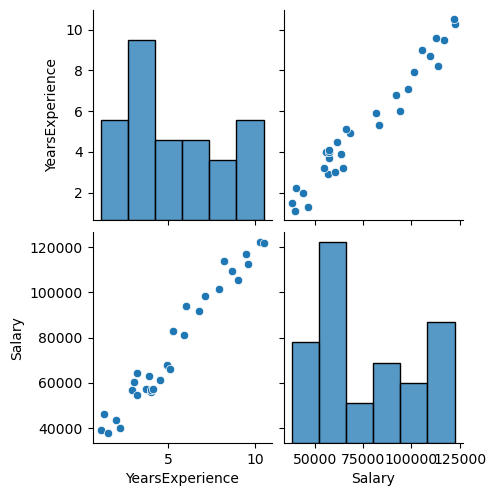

In [13]:
sns.pairplot(df)
plt.show()

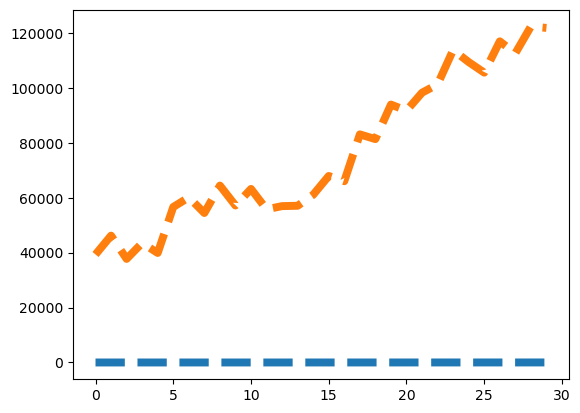

In [14]:
plt.plot(df, linestyle='--', linewidth='5.7')
plt.show()

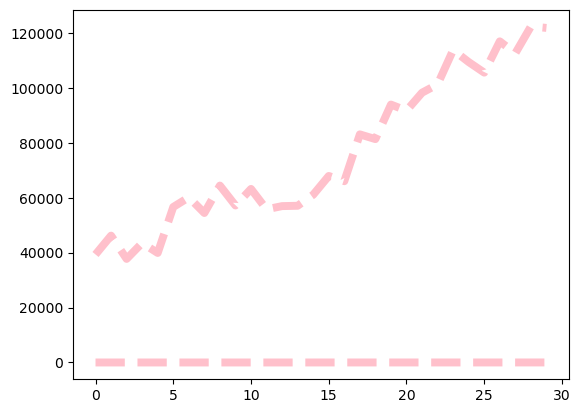

In [15]:
plt.plot(df, linestyle='--', linewidth='5.7', color='pink')
plt.show()

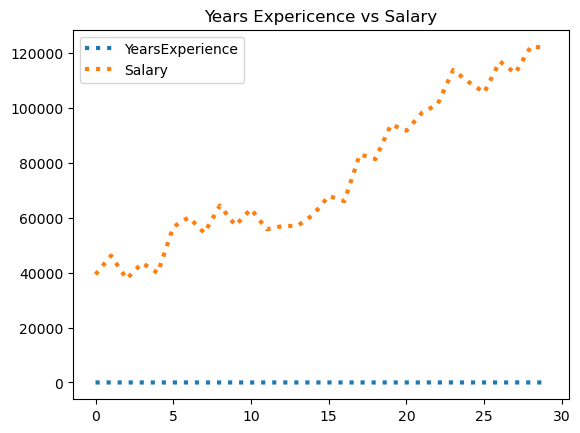

In [16]:
df.plot.line(linestyle=':',linewidth='3')
plt.title("Years Expericence vs Salary")
plt.show()

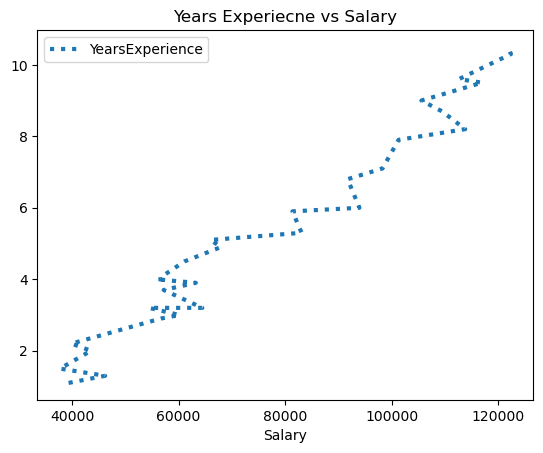

In [17]:
df = pd.DataFrame(data=df)
df.plot.line(x='Salary', linestyle=':',linewidth='3')
plt.title('Years Experiecne vs Salary')
plt.show()

In [18]:
X = df.drop('Salary', axis=1)
y = df.Salary

In [19]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [20]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [22]:
print(X_train.shape)

(21, 1)


In [23]:
X_test.shape

(9, 1)

In [24]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

In [25]:
Lr.fit(X_train, y_train)

LinearRegression()

In [26]:
Lr.intercept_

26298.392363461156

In [27]:
Lr.coef_

array([9313.3947354])

In [28]:
y_pred = Lr.predict(X_test)

In [29]:
y_pred

array([ 38405.80551948, 102668.22919372, 107324.92656142,  71934.02656691,
        75659.38446107,  40268.48446656,  63551.97130505,  73796.70551399,
       122226.35813806])

In [30]:
y_test

1      46205
23    113812
24    109431
15     67938
17     83088
2      37731
11     55794
16     66029
28    122391
Name: Salary, dtype: int64

In [31]:
from sklearn import metrics
R2 = metrics.r2_score(y_test, y_pred)

In [32]:
R2

0.949248634794894

In [33]:
metrics.mean_absolute_error(y_test, y_pred)

5633.498219861794

In [34]:
metrics.mean_squared_error(y_test, y_pred)

43065385.20977732

In [35]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

6562.422205998127

In [36]:
error = y_test - y_pred

In [37]:
error

1      7799.194481
23    11143.770806
24     2106.073439
15    -3996.026567
17     7428.615539
2     -2537.484467
11    -7757.971305
16    -7767.705514
28      164.641862
Name: Salary, dtype: float64

In [39]:
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

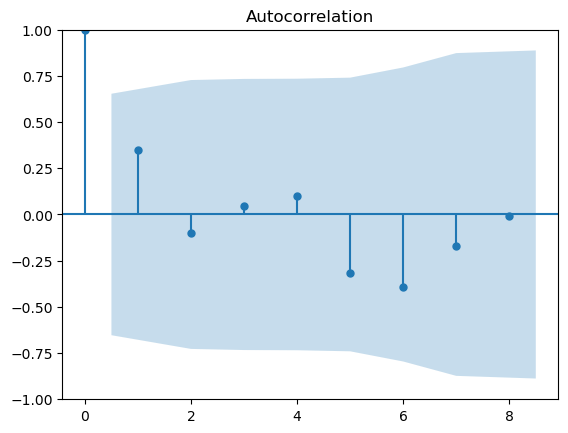

In [40]:
acf = plot_acf(error)
plt.show()

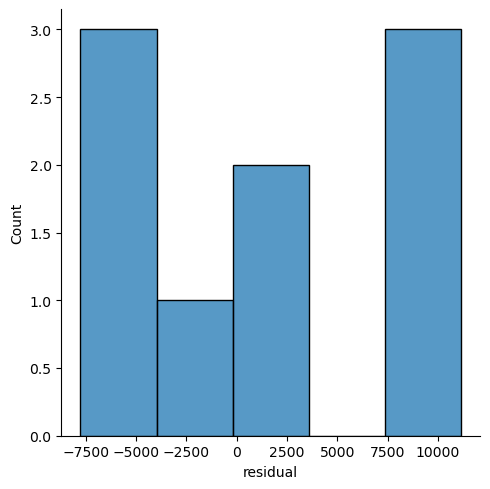

In [41]:
sns.displot(error)
plt.xlabel('residual')
plt.show()